In [12]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
collections_we_have = ["cool cats", "meebits", "pudgy penguins"]
print("Hello future NFT flipper! Please let me know the collection you are interested in.")
collection = input("Enter name of Opensea collection: ").lower()
print(collection)

Hello future NFT flipper! Please let me know the collection you are interested in.
Enter name of Opensea collection: Pudgy penguins
pudgy penguins


In [14]:
if collection in collections_we_have:
    print("Great, we can help predict prices for you today")

else:
    print("We cannot help you today, stay tuned for more NFT predictions")

Great, we can help predict prices for you today


In [15]:
if collection == "cool cats":
    df = pd.read_csv("coolcats_data.csv", index_col=0)
    
elif collection == "pudgy penguins":
    df = pd.read_csv("pudgy_data.csv", index_col=0)
    
else:
    print("Sorry, we will have more collections soon!")

In [18]:
df

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473.0,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726.0,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854.0,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778.0,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469.0,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629.0,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875.0,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269.0,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


In [19]:
def prepare_the_data(data):
    #ensure index is a datetime
    data.index = pd.to_datetime(data.index)
    #drop zero ETH transactions
    droplist = data[data["total_price_eth"] == 0.0]
    data.drop(droplist.index, inplace=True)
    ts = data["total_price_eth"].resample('4H').min()
    ready_ts = ts.bfill()
    return ready_ts

<AxesSubplot:xlabel='created_date'>

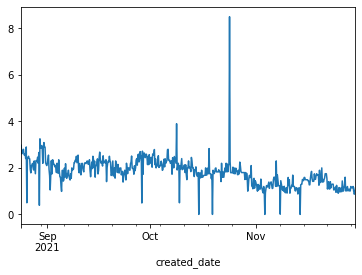

In [20]:
pudgy_ts = prepare_the_data(df)
pudgy_ts.plot()

In [48]:
def model_the_data(ts):
    model = ARIMA(ts, order=(0, 1, 1)).fit()
    predict = model.predict(typ="levels")
    
    rmse = np.sqrt(mean_squared_error(ts, predict))
    print(f"RMSE: {rmse}")
    
    fc = model.forecast(42, alpha=0.05) #one week of forecasted predictions = 42 observations
    floor_in_a_week = fc[41:].values
    print(f"Our model predicts the floor price will be {floor_in_a_week} in a week")
    print("If you spent less than that, we predict you can flip for a profit")
    return predict, fc

In [49]:
predictions, forecast = model_the_data(pudgy_ts)

RMSE: 0.4585645569310412
Our model predicts the floor price will be [1.06213189] in a week
If you spent less than that, we predict you can flip for a profit
